# Conformal completion of Minkowski spacetime

This Jupyter/SageMath worksheet is relative to the lectures
[Geometry and physics of black holes](http://luth.obspm.fr/~luthier/gourgoulhon/bh16/)
  
These computations are based on [SageManifolds](http://sagemanifolds.obspm.fr) (v0.9)

The worksheet file (ipynb format) can be downloaded from [here](https://raw.githubusercontent.com/egourgoulhon/BHLectures/master/sage/conformal_Minkowski.ipynb).


First we set up the notebook to display mathematical objects using LaTeX formatting:

In [1]:
%display latex

## Spherical coordinates on Minkowski spacetime

We declare the spacetime manifold $M$:

In [2]:
M = Manifold(4, 'M')
print M

4-dimensional differentiable manifold M


and the spherical coordinates $(t,r,\theta,\phi)$ as a chart on $M$:

In [3]:
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
X

Chart (M, (t, r, th, ph))

In term of these coordinates, the Minkowski metric is

In [4]:
g = M.lorentzian_metric('g')
g[0,0] = -1
g[1,1] = 1
g[2,2] = r^2
g[3,3] = r^2*sin(th)^2
g.display()

g = -dt*dt + dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

## Null coordinates

Let us introduce the null coordinates $u=t-r$ (retarded time) and $v=t+r$ (advanced time):

In [5]:
XN.<u,v,th,ph> = M.chart(r'u v th:(0,pi):\theta ph:(0,2*pi):\phi')
XN.add_restrictions(v-u>0)
XN

Chart (M, (u, v, th, ph))

In [6]:
X_to_XN = X.transition_map(XN, [t-r, t+r, th, ph])
X_to_XN.display()

u = -r + t
v = r + t
th = th
ph = ph

In [7]:
X_to_XN.inverse().display()

t = 1/2*u + 1/2*v
r = -1/2*u + 1/2*v
th = th
ph = ph

In terms of the null coordinates $(u,v,\theta,\phi)$, the Minkowski metric writes

In [8]:
g.display(XN.frame(), XN)

g = -1/2 du*dv - 1/2 dv*du + (1/4*u^2 - 1/2*u*v + 1/4*v^2) dth*dth + (1/4*u^2*sin(th)^2 - 1/2*u*v*sin(th)^2 + 1/4*v^2*sin(th)^2) dph*dph

Let us plot the coordinate grid $(u,v)$ in terms of the coordinates $(t,r)$:

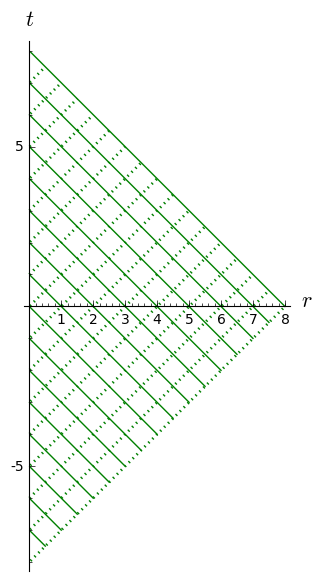

In [9]:
graph = XN.plot(X, ambient_coords=(r,t), fixed_coords={th: pi/2, ph: pi}, nb_values=17,
                plot_points=200, color='green', style={u: '-', v: ':'}, thickness={u: 1, v: 2})
show(graph)

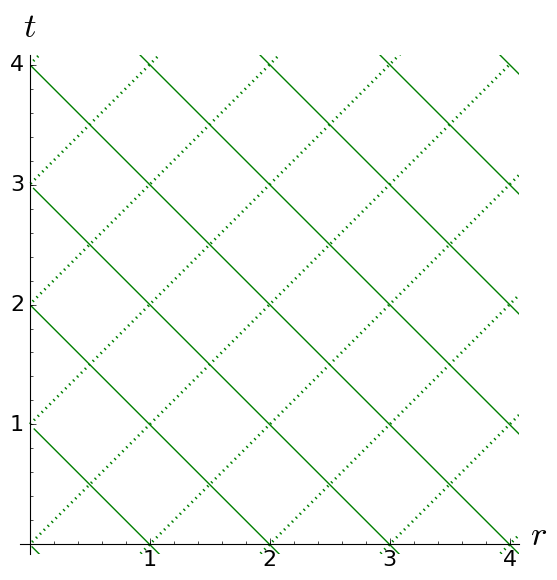

In [10]:
show(graph, xmin=0, xmax=4, ymin=0, ymax=4, aspect_ratio=1, fontsize=16)

In [11]:
graph.save("glo_null_coord.pdf", xmin=0, xmax=4, ymin=0, ymax=4, aspect_ratio=1, fontsize=16)

## Compactified null coordinates

Instead of $(u,v)$, which span $\mathbb{R}$, let consider the coordinates $U = \mathrm{atan}\,  u$ and $V = \mathrm{atan}\, v$, which span $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$:

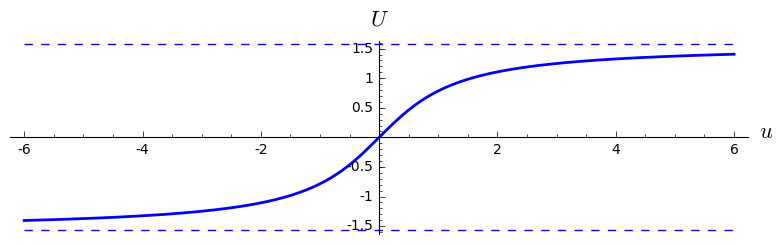

In [12]:
graph = plot(atan(u), (u,-6, 6), thickness=2, axes_labels=[r'$u$', r'$U$']) + \
        line([(-6,-pi/2), (6,-pi/2)], linestyle='--') + \
        line([(-6,pi/2), (6,pi/2)], linestyle='--')
show(graph, aspect_ratio=1)

In [13]:
graph.save('glo_atan.pdf', aspect_ratio=1)

In [14]:
XNC.<U,V,th,ph> = M.chart(r'U:(-pi/2,pi/2) V:(-pi/2,pi/2) th:(0,pi):\theta ph:(0,2*pi):\phi')
XN.add_restrictions(V-U>0)
XNC

Chart (M, (U, V, th, ph))

In [15]:
XN_to_XNC = XN.transition_map(XNC, [atan(u), atan(v), th, ph])
XN_to_XNC.display()

U = arctan(u)
V = arctan(v)
th = th
ph = ph

In [16]:
XN_to_XNC.inverse().display()

u = tan(U)
v = tan(V)
th = th
ph = ph

Expressed in terms of the coordinates $(U,V,\theta,\phi)$, the metric tensor is

In [17]:
g.display(XNC.frame(), XNC)

g = -1/2/(cos(U)^2*cos(V)^2) dU*dV - 1/2/(cos(U)^2*cos(V)^2) dV*dU + 1/4*(cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2)/(cos(U)^2*cos(V)^2) dth*dth + 1/4*(cos(V)^2*sin(U)^2*sin(th)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V)*sin(th)^2 + cos(U)^2*sin(V)^2*sin(th)^2)/(cos(U)^2*cos(V)^2) dph*dph

Let us call $\Omega^{-2}$ the common factor: 

In [18]:
Omega = M.scalar_field({XNC: 2*cos(U)*cos(V)}, name='Omega', latex_name=r'\Omega')
Omega.display()

Omega: M --> R
   (u, v, th, ph) |--> 2/(sqrt(u^2 + 1)*sqrt(v^2 + 1))
   (U, V, th, ph) |--> 2*cos(U)*cos(V)

In [19]:
Omega.display(X)

Omega: M --> R
   (t, r, th, ph) |--> 2/(sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1))

## Conformal metric

We introduce the metric $\tilde g = \Omega^2 g$:

In [20]:
gt = M.lorentzian_metric('gt', latex_name=r'\tilde{g}')
gt.set(Omega^2*g)
gt.display(XNC.frame(), XNC)

gt = -2 dU*dV - 2 dV*dU + (cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2) dth*dth + (cos(V)^2*sin(U)^2*sin(th)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V)*sin(th)^2 + cos(U)^2*sin(V)^2*sin(th)^2) dph*dph

Clearly the metric components ${\tilde g}_{\theta\theta}$ and ${\tilde g}_{\phi\phi}$ can be simplified further. Let us do it by hand, by extracting the symbolic expression via `expr()`:

In [21]:
g22 = gt[XNC.frame(), 2, 2, XNC].expr()
g22

cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2

In [22]:
g22.factor().reduce_trig()

sin(-U + V)^2

In [23]:
g33st = gt[XNC.frame(), 3, 3, XNC].expr() / sin(th)^2
g33st

(cos(V)^2*sin(U)^2*sin(th)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V)*sin(th)^2 + cos(U)^2*sin(V)^2*sin(th)^2)/sin(th)^2

In [24]:
g33st.factor().reduce_trig()

sin(-U + V)^2

In [25]:
gt.add_comp(XNC.frame())[2,2, XNC] = g22.factor().reduce_trig()
gt.add_comp(XNC.frame())[3,3, XNC] = g33st.factor().reduce_trig() * sin(th)^2

Hence the final form of the conformal metric in terms of the compactified null coordinates:

In [26]:
gt.display(XNC.frame(), XNC)

gt = -2 dU*dV - 2 dV*dU + sin(-U + V)^2 dth*dth + sin(-U + V)^2*sin(th)^2 dph*dph

In terms of the non-compactified null coordinates $(u,v,\theta,\phi)$:

In [27]:
gt.display(XN.frame(), XN)

gt = -2/((u^2 + 1)*v^2 + u^2 + 1) du*dv - 2/((u^2 + 1)*v^2 + u^2 + 1) dv*du + (u^2 - 2*u*v + v^2)/((u^2 + 1)*v^2 + u^2 + 1) dth*dth + (u^2*sin(th)^2 - 2*u*v*sin(th)^2 + v^2*sin(th)^2)/((u^2 + 1)*v^2 + u^2 + 1) dph*dph

and in terms of the default coordinates $(t,r,\theta,\phi)$:

In [28]:
gt.display()

gt = -4/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1) dt*dt + 4/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1) dr*dr + 4*r^2/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1) dth*dth + 4*r^2*sin(th)^2/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1) dph*dph

## Einstein cylinder coordinates

Let us introduce some coordinates $(\tau,\chi)$ such that the null coordinates $(U,V)$ are
respectively half the retarded time $\tau -\chi$ and half the advanced time $\tau+\chi$:

In [29]:
XC.<ta,ch,th,ph> = M.chart(r'ta:(-pi,pi):\tau ch:(0,pi):\chi th:(0,pi):\theta ph:(0,2*pi):\phi')
XC.add_restrictions([ta<pi-ch, ta>ch-pi])
XC

Chart (M, (ta, ch, th, ph))

In [30]:
XC_to_XNC = XC.transition_map(XNC, [(ta-ch)/2, (ta+ch)/2, th, ph])
XC_to_XNC.display()

U = -1/2*ch + 1/2*ta
V = 1/2*ch + 1/2*ta
th = th
ph = ph

In [31]:
XC_to_XNC.inverse().display()

ta = U + V
ch = -U + V
th = th
ph = ph

The conformal metric takes then the form of the standard metric on the Einstein cylinder
$\mathbb{R}\times\mathbb{S}^3$:

In [32]:
gt.display(XC.frame(), XC)

gt = -dta*dta + dch*dch + sin(ch)^2 dth*dth + sin(ch)^2*sin(th)^2 dph*dph

The square of the conformal factor expressed in all the coordinates introduced so far:

In [33]:
(Omega^2).display()

Omega^2: M --> R
   (t, r, th, ph) |--> 4/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1)
   (u, v, th, ph) |--> 4/((u^2 + 1)*v^2 + u^2 + 1)
   (U, V, th, ph) |--> 4*cos(U)^2*cos(V)^2
   (ta, ch, th, ph) |--> 4*cos(1/2*ch)^4*cos(1/2*ta)^4 - 8*cos(1/2*ch)^2*cos(1/2*ta)^2*sin(1/2*ch)^2*sin(1/2*ta)^2 + 4*sin(1/2*ch)^4*sin(1/2*ta)^4

In [34]:
X_to_XC = M.coord_change(XNC,XC) * M.coord_change(XN, XNC) * M.coord_change(X, XN)
X_to_XC.display()

ta = arctan(r + t) + arctan(-r + t)
ch = arctan(r + t) - arctan(-r + t)
th = th
ph = ph

In [35]:
XC_to_X = M.coord_change(XN, X) * M.coord_change(XNC, XN) * M.coord_change(XC,XNC)
XC_to_X.display()

t = cos(1/2*ta)*sin(1/2*ta)/(cos(1/2*ch)^2*cos(1/2*ta)^2 - sin(1/2*ch)^2*sin(1/2*ta)^2)
r = cos(1/2*ch)*sin(1/2*ch)/(cos(1/2*ch)^2*cos(1/2*ta)^2 - sin(1/2*ch)^2*sin(1/2*ta)^2)
th = th
ph = ph

## Conformal Penrose diagram

Let us draw the coordinate grid $(t,r)$ in terms of the coordinates $(\tau,\chi)$:

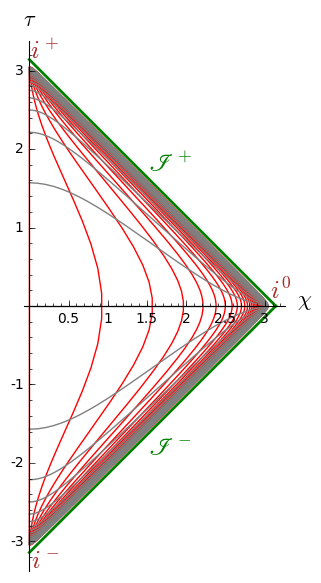

In [36]:
graph = X.plot(XC, ambient_coords=(ch, ta), fixed_coords={th: pi/2, ph: pi}, 
               plot_points=200, max_range=20, nb_values=41, color={t: 'red', r: 'grey'})
graph += text(r"$i^0$", (3.2, 0.2), fontsize=18, color='brown')
graph += text(r"$i^+$", (0.2, 3.25), fontsize=18, color='brown')
graph += text(r"$i^-$", (0.2, -3.25), fontsize=18, color='brown')
graph += line([(0,pi), (pi,0)], color='green', thickness=2) + \
         text(r"$\mathscr{I}^+$", (1.8, 1.8), fontsize=18, color='green')
graph += line([(0,-pi), (pi,0)], color='green', thickness=2) + \
         text(r"$\mathscr{I}^-$", (1.8, -1.8), fontsize=18, color='green')
show(graph)

Some blow-up near $i^0$:

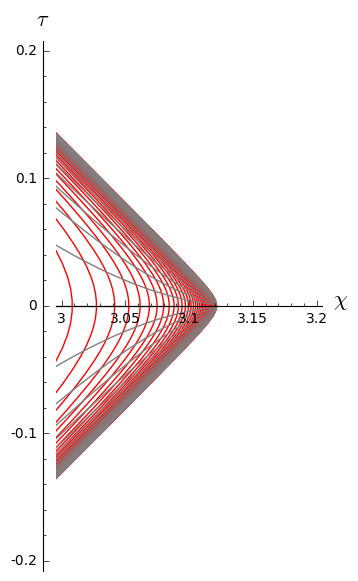

In [37]:
graph = X.plot(XC, ambient_coords=(ch, ta), fixed_coords={th: pi/2, ph: pi}, 
               plot_points=200, max_range=100, nb_values=41, color={t: 'red', r: 'grey'})
show(graph, xmin=3., xmax=3.2, ymin=-0.2, ymax=0.2, aspect_ratio=1)

To produce a more satisfactory figure, let us use some logarithmic radial coordinate:

In [38]:
XL.<t, rh, th, ph> = M.chart(r't rh:\rho th:(0,pi):\theta ph:(0,2*pi):\phi')
XL

Chart (M, (t, rh, th, ph))

In [39]:
X_to_XL = X.transition_map(XL, [t, ln(r), th, ph])
X_to_XL.display()

t = t
rh = log(r)
th = th
ph = ph

In [40]:
X_to_XL.inverse().display()

t = t
r = e^rh
th = th
ph = ph

In [41]:
XL_to_XC = M.coord_change(X, XC) * M.coord_change(XL, X)
XC_to_XL = M.coord_change(X, XL) * M.coord_change(XC, X)

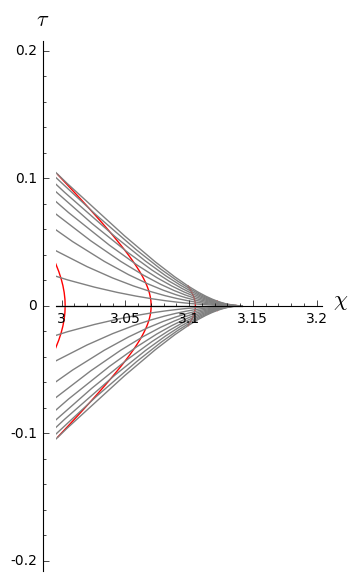

In [42]:
graph = XL.plot(XC, ambient_coords=(ch, ta), fixed_coords={th: pi/2, ph: pi}, 
                ranges={t: (-20, 20), rh: (-2, 10)}, nb_values=19, 
                color={t: 'red', rh: 'grey'})
show(graph, xmin=3., xmax=3.2, ymin=-0.2, ymax=0.2, aspect_ratio=1)